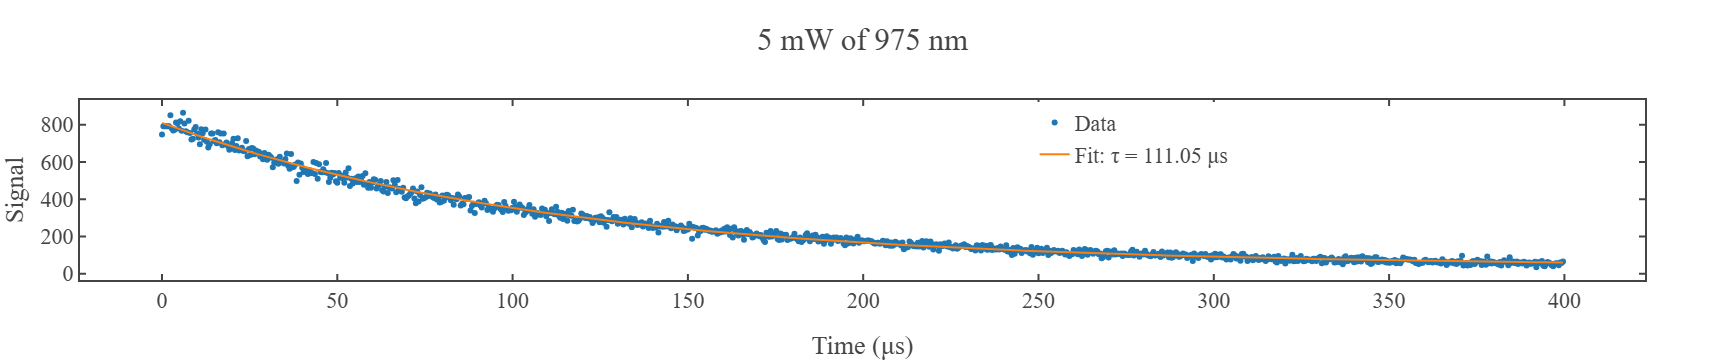

File: 975_5mW lifetime.txt
Power: 5.0 mW | Estimated Lifetime (tau): 111.0538 μs



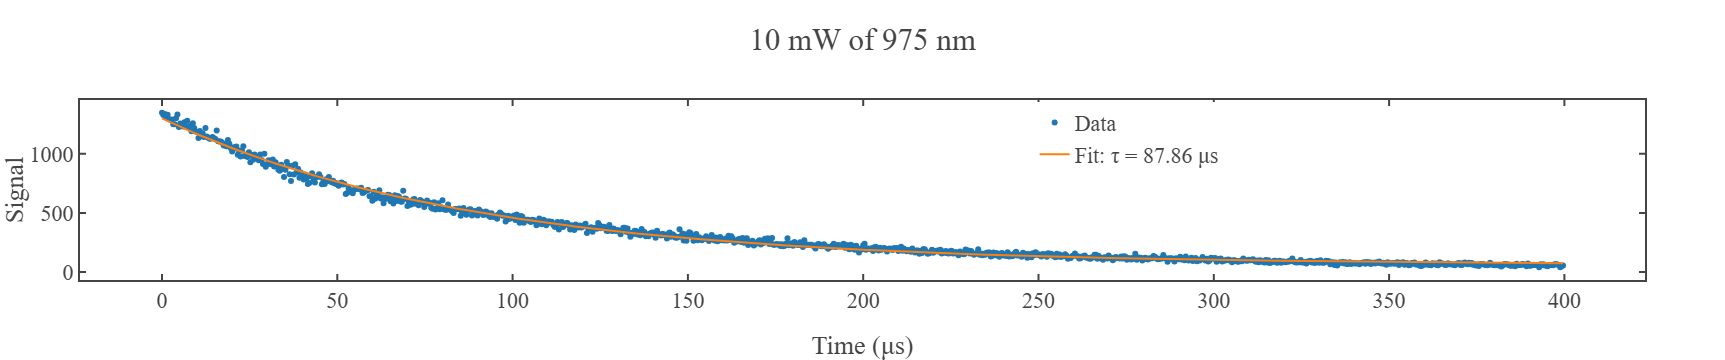

File: 975_10mW lifetime.txt
Power: 10.0 mW | Estimated Lifetime (tau): 87.8563 μs



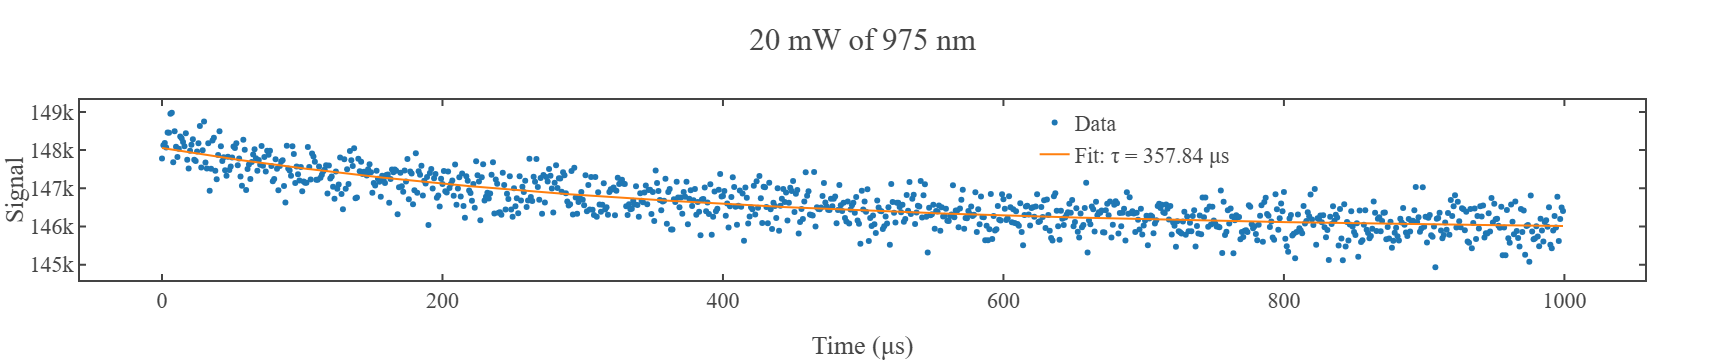

File: 975_20mW const 1064_2.5 mW CW 500HZ pulsing.txt
Power: 20.0 mW | Estimated Lifetime (tau): 357.8364 μs



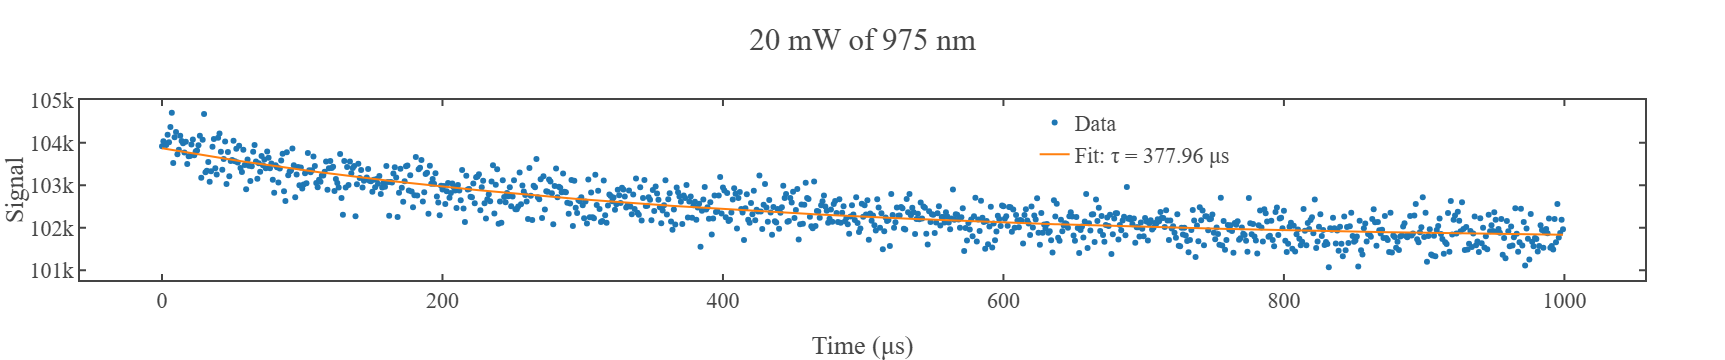

File: 975_20mW const 1064_3.5mW 500HZ pulsing.txt
Power: 20.0 mW | Estimated Lifetime (tau): 377.9599 μs



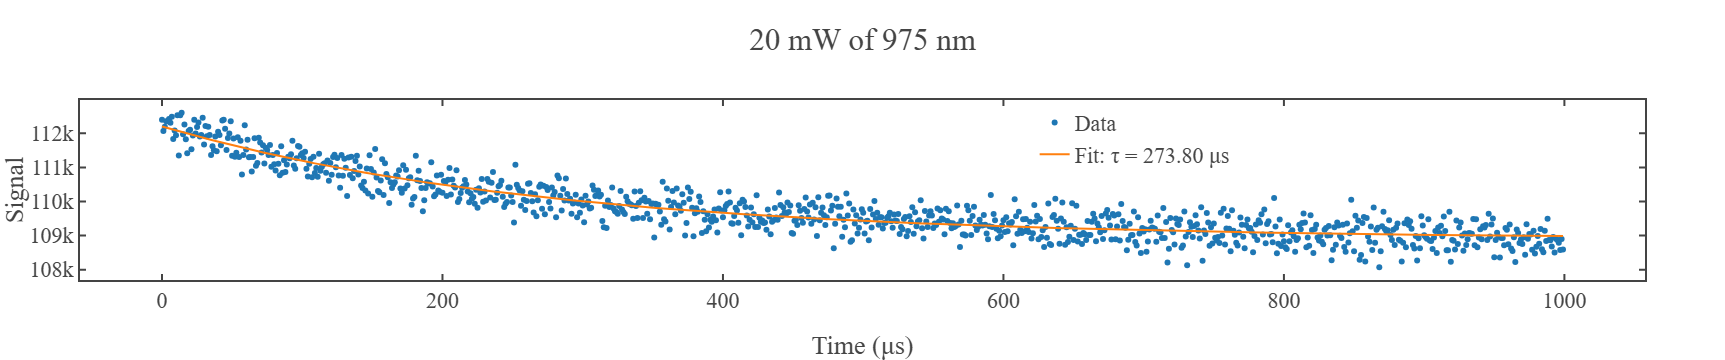

File: 975_20mW const 1064_3.8mW 500HZ pulsing.txt
Power: 20.0 mW | Estimated Lifetime (tau): 273.7952 μs



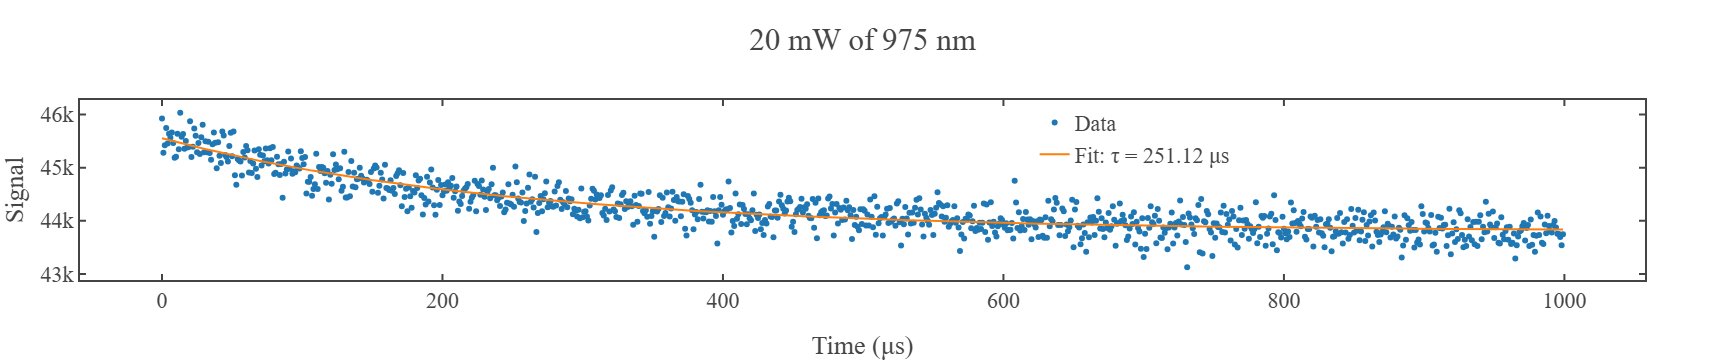

File: 975_20mW const 1064_500HZ pulsing.txt
Power: 20.0 mW | Estimated Lifetime (tau): 251.1250 μs



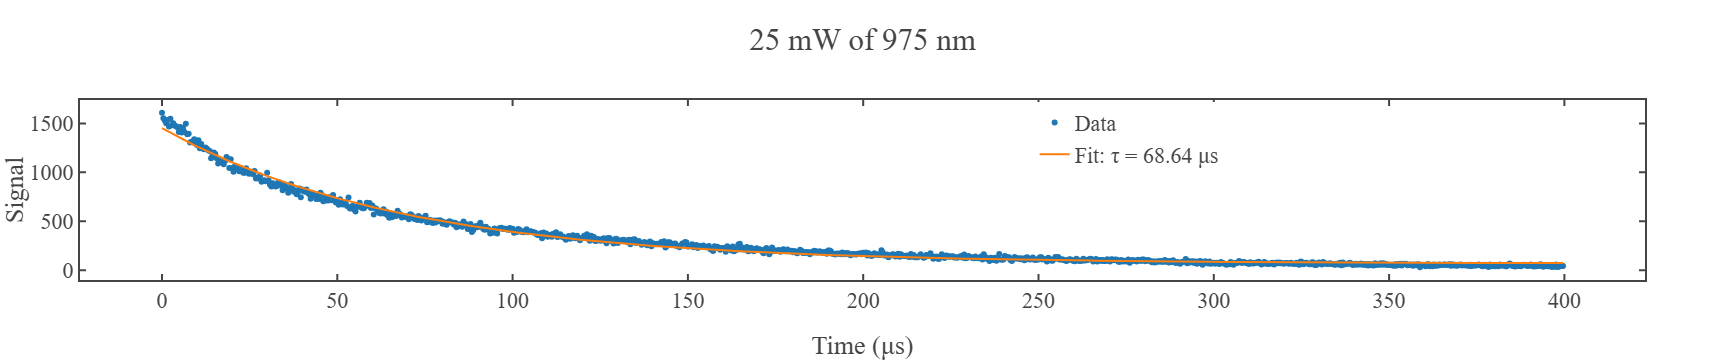

File: 975_25mW lifetime.txt
Power: 25.0 mW | Estimated Lifetime (tau): 68.6402 μs



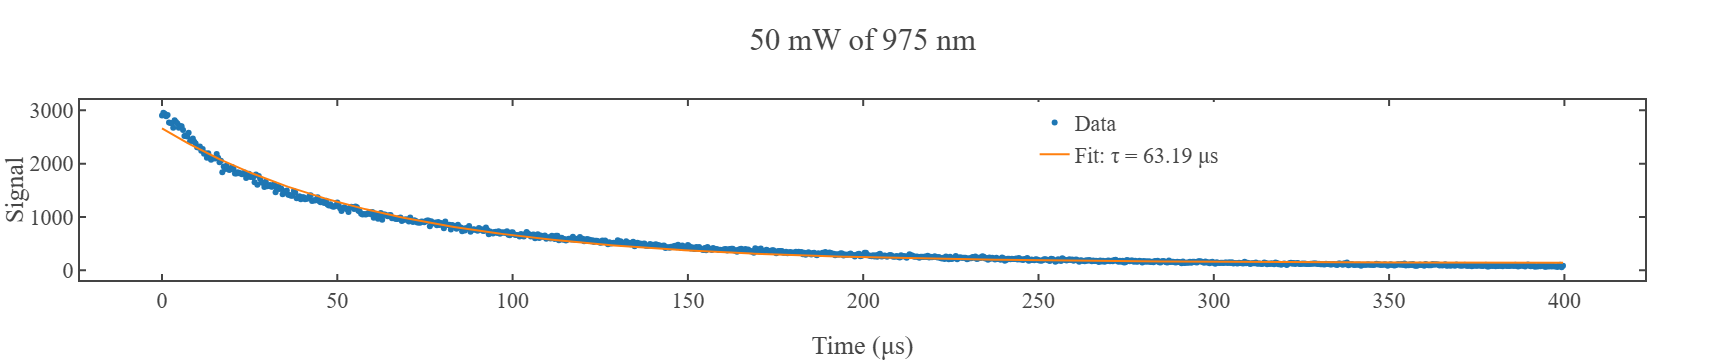

File: 975_50mW lifetime.txt
Power: 50.0 mW | Estimated Lifetime (tau): 63.1937 μs



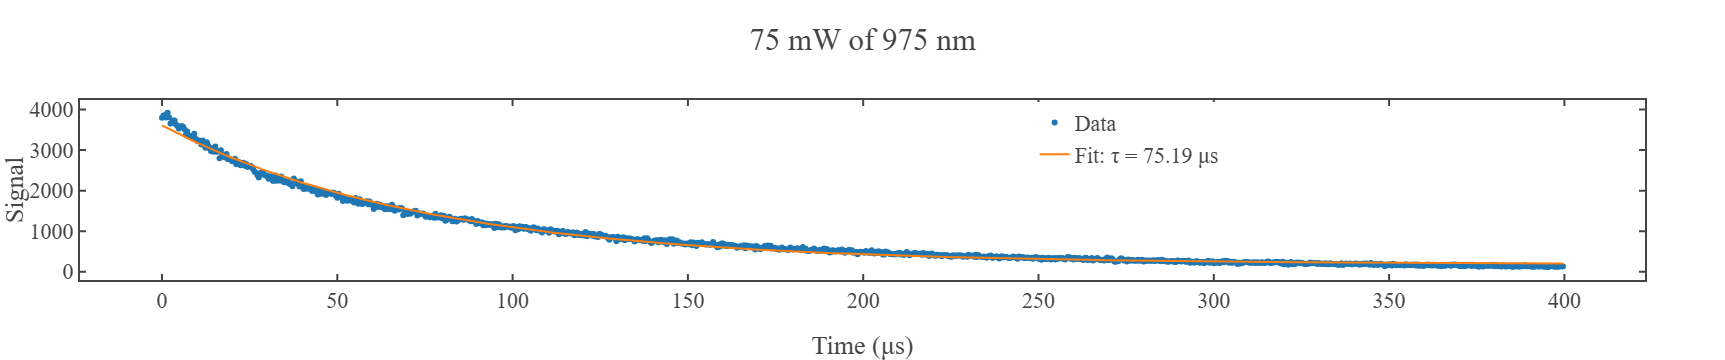

File: 975_75mW lifetime.txt
Power: 75.0 mW | Estimated Lifetime (tau): 75.1933 μs



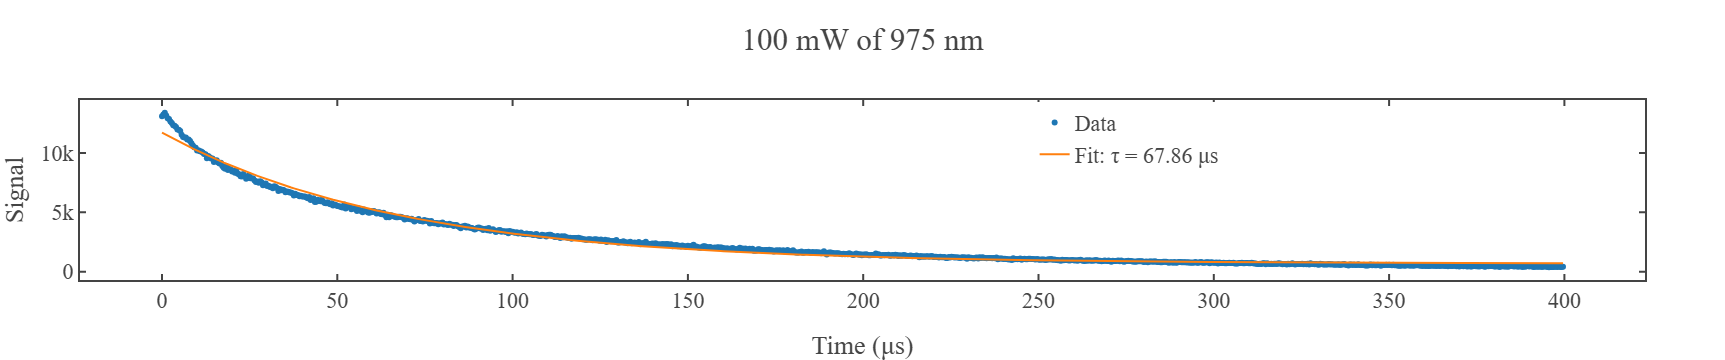

File: 975_100mW lifetime.txt
Power: 100.0 mW | Estimated Lifetime (tau): 67.8567 μs



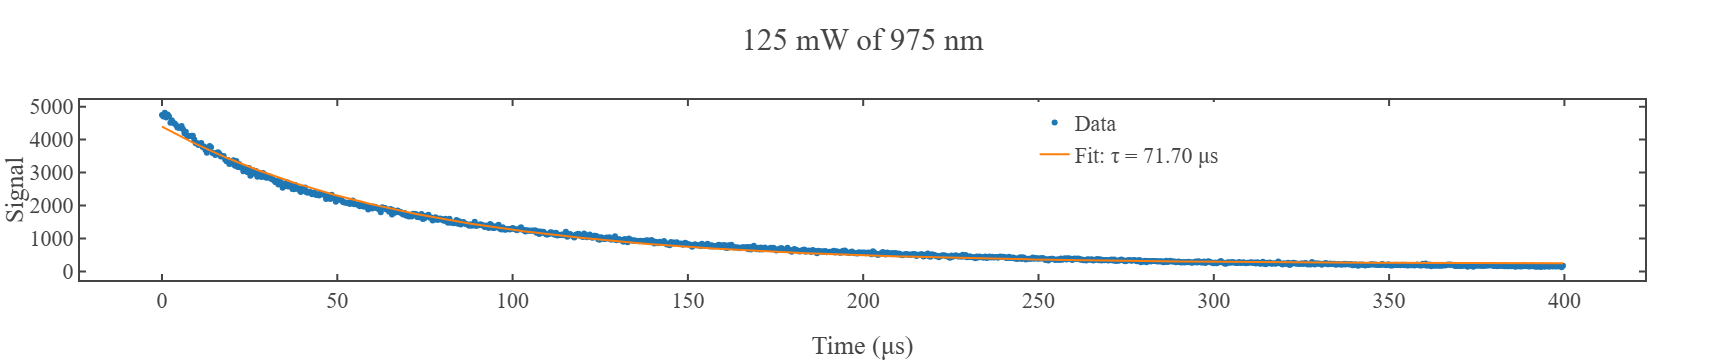

File: 975_125mW lifetime.txt
Power: 125.0 mW | Estimated Lifetime (tau): 71.6990 μs



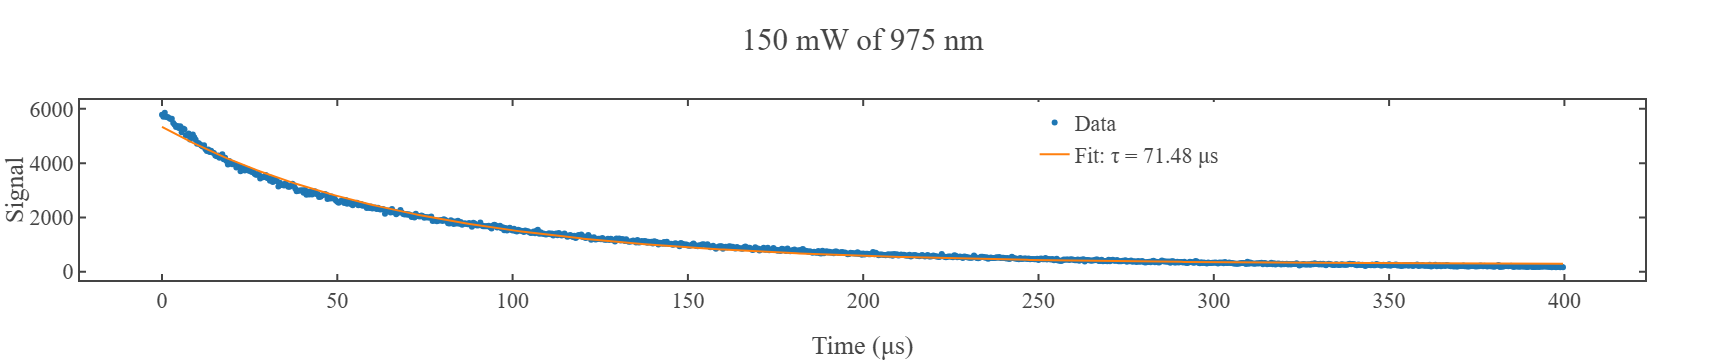

File: 975_150mW lifetime.txt
Power: 150.0 mW | Estimated Lifetime (tau): 71.4773 μs



In [29]:
import numpy as np
import plotly.graph_objects as go
from scipy.optimize import curve_fit
import os
import glob
import re

# -----------------------------
# Custom Plotly Template
# -----------------------------
fig_template = go.layout.Template()
fig_template.layout = {
    'template': 'simple_white+presentation',
    'autosize': False,
    'width': 800,
    'height': 600,
    'xaxis': {
        'ticks': 'inside',
        'mirror': 'ticks',
        'linewidth': 2.0,
        'tickwidth': 2.0,
        'ticklen': 6,
        'showline': True,
        'showgrid': False,
        'zerolinecolor': 'white',
    },
    'yaxis': {
        'ticks': 'inside',
        'mirror': 'ticks',
        'linewidth': 2.0,
        'tickwidth': 2.0,
        'ticklen': 6,
        'showline': True,
        'showgrid': False,
        'zerolinecolor': 'white'
    },
    'font': {
        'family': 'mathjax',
        'size': 22,
    }
}

# -----------------------------
# Folder & Files
# -----------------------------
folder_path = r'D:\Data\2025\August\21 Aug Tm UCP spectra dual beam Agniva\Bi UCP Red emission\23 august'
file_pattern = os.path.join(folder_path, '*.txt')
txt_files = glob.glob(file_pattern)

# -----------------------------
# Extract Power from Filename
# -----------------------------
def extract_power_mW(filename):
    match = re.search(r'(\d+\.?\d*)\s*mW', filename, re.IGNORECASE)
    if match:
        return float(match.group(1))
    else:
        return float('inf')  # Put unmatched files at the end

# Sort files by extracted 975nm power
txt_files.sort(key=lambda x: extract_power_mW(os.path.basename(x)))

# -----------------------------
# Exponential Decay Function
# -----------------------------
def exp_decay(t, A, tau, C):
    return A * np.exp(-t / tau) + C

# -----------------------------
# Process Each File
# -----------------------------
for file_path in txt_files:
    data = np.loadtxt(file_path, skiprows=1)  # Skip header row
    t = data[:, 0]
    y = data[:, 1]

    initial_guess = [max(y), (max(t) - min(t)) / 2, min(y)]

    try:
        params, _ = curve_fit(exp_decay, t, y, p0=initial_guess)
        A_fit, tau_fit, C_fit = params

        t_fit = np.linspace(min(t), max(t), 500)
        y_fit = exp_decay(t_fit, *params)

        # Extract power from filename for labeling
        power_mW = extract_power_mW(os.path.basename(file_path))

        fig = go.Figure()
        fig.add_trace(go.Scatter(x=t / 1e6, y=y, mode='markers', name='Data'))
        fig.add_trace(go.Scatter(x=t_fit / 1e6, y=y_fit, mode='lines',
                                 name=f'Fit: τ = {tau_fit / 1e6:.2f} μs'))

        fig.update_layout(
            xaxis_title='Time (μs)',
            yaxis_title='Signal',
            template=fig_template,
            legend=dict(x=0.61, y=0.99),
            title=f'{power_mW:.0f} mW of 975 nm'
        )

        fig.show()

        print(f"File: {os.path.basename(file_path)}")
        print(f"Power: {power_mW:.1f} mW | Estimated Lifetime (tau): {tau_fit / 1e6:.4f} μs\n")

    except RuntimeError:
        print(f"Fit failed for file: {os.path.basename(file_path)}")